<a href="https://colab.research.google.com/github/mslucke99/document-reader/blob/main/Fine_Tune_a_Detectron2_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install 'git+https://github.com/facebookresearch/detectron2.git'
!pip3 install pandas

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-jirhmqpk
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-jirhmqpk


In [5]:
!python "/content/data_files/scripts/train_net.py" --dataset_name "my_dataset" --json_annotation_train "/content/data_files/images/val.json" --image_path_train "/content/data_files/images" --json_annotation_val "/content/data_files/images/val.json" --image_path_val "/content/data_files/images" --config-file "/content/data_files/model/config.yaml" MODEL.WEIGHTS "/content/data_files/model/model_final.pth" OUTPUT_DIR "/content/output" MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE 256 SOLVER.CHECKPOINT_PERIOD 20 SOLVER.MAX_ITER 10 SOLVER.IMS_PER_BATCH 5 INPUT.RANDOM_FLIP "vertical"

Command Line Args: Namespace(config_file='/content/data_files/model/config.yaml', dataset_name='my_dataset', dist_url='tcp://127.0.0.1:49152', eval_only=False, image_path_train='/content/data_files/images', image_path_val='/content/data_files/images', json_annotation_train='/content/data_files/images/val.json', json_annotation_val='/content/data_files/images/val.json', machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', '/content/data_files/model/model_final.pth', 'OUTPUT_DIR', '/content/output', 'MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE', '256', 'SOLVER.CHECKPOINT_PERIOD', '20', 'SOLVER.MAX_ITER', '10', 'SOLVER.IMS_PER_BATCH', '5', 'INPUT.RANDOM_FLIP', 'vertical'], resume=False)
[04/22 02:40:16 detectron2]: Rank of current process: 0. World size: 1
[04/22 02:40:17 detectron2]: Environment info:
----------------------  ----------------------------------------------------------------
sys.platform            linux
Python                  3.7.13 (default, Mar 16 2022, 17:37:17)

In [4]:
!pip3 install layoutparser
import layoutparser as lp
model = lp.Detectron2LayoutModel(r"/content/output/config.yaml",
                                 r"/content/output/model_final.pth",
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8])

AssertionError: ignored

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


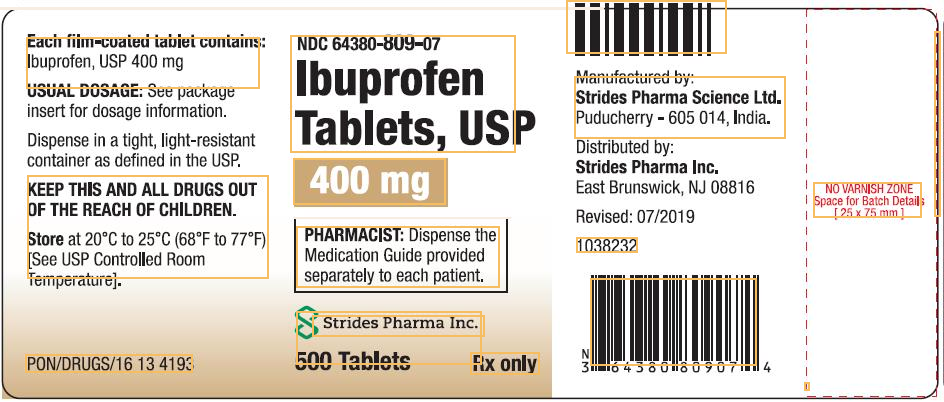

In [3]:
!pip3 install numpy
#!pip3 install pillow==4.1.1

!!pip install -U pillow
%reload_ext autoreload
%autoreload
import PIL
#print(PIL.PILLOW_VERSION)
from PIL import Image
from numpy import asarray
img = Image.open("/content/data_files/images/ti2.jpeg")
numpydata = asarray(img)
layout = model.detect(numpydata)
lp.visualization.draw_box(img, layout)

# New Section